In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [59]:
import pandas as pd
data=pd.read_csv("iris.csv")
data.head(9)



,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa


In [60]:
data['variety']=data['variety'].map({'Setosa':0,'Versicolor':1,'Virginica':2})

x=data[['sepal.length','sepal.width','petal.length','petal.width']]
y=data['variety']
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [61]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=30)

knn=KNeighborsClassifier(n_neighbors=40)  
knn.fit(x_train,y_train)  
y_pred=knn.predict(x_test) 
print('Acuuracy=',accuracy_score(y_pred,y_test))


Acuuracy= 0.9333333333333333


In [62]:
n_neighbors=50
scores=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.77
Accuracy for k= 2 is: 0.77
Accuracy for k= 3 is: 0.8
Accuracy for k= 4 is: 0.8
Accuracy for k= 5 is: 0.8
Accuracy for k= 6 is: 0.92
Accuracy for k= 7 is: 0.92
Accuracy for k= 8 is: 0.93
Accuracy for k= 9 is: 0.92
Accuracy for k= 10 is: 0.93
Accuracy for k= 11 is: 0.93
Accuracy for k= 12 is: 0.93
Accuracy for k= 13 is: 0.92
Accuracy for k= 14 is: 0.95
Accuracy for k= 15 is: 0.95
Accuracy for k= 16 is: 0.93
Accuracy for k= 17 is: 0.93
Accuracy for k= 18 is: 0.93
Accuracy for k= 19 is: 0.93
Accuracy for k= 20 is: 0.93
Accuracy for k= 21 is: 0.92
Accuracy for k= 22 is: 0.95
Accuracy for k= 23 is: 0.93
Accuracy for k= 24 is: 0.92
Accuracy for k= 25 is: 0.96
Accuracy for k= 26 is: 0.93
Accuracy for k= 27 is: 0.96
Accuracy for k= 28 is: 0.96
Accuracy for k= 29 is: 0.96
Accuracy for k= 30 is: 0.97
Accuracy for k= 31 is: 0.97
Accuracy for k= 32 is: 0.95
Accuracy for k= 33 is: 0.97
Accuracy for k= 34 is: 0.97
Accuracy for k= 35 is: 0.96
Accuracy for k= 36 is: 0.96
Accu

Text(0, 0.5, 'Testing Accuracy')

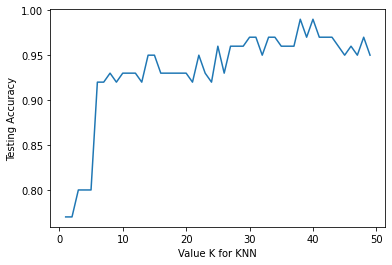

In [63]:
import matplotlib.pyplot as plt
plt.plot(range(1,50),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

In [64]:

def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [65]:

from math import sqrt

def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
row0 = dataset[0]
for row in dataset:
	distance = euclidean_distance(row0, row)
	print(distance)

0.0
1.3290173915275787
1.9494646655653247
1.5591439385540549
0.5356280721938492
4.850940186986411
2.592833759950511
4.214227042632867
6.522409988228337
4.985585382449795


In [66]:
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

In [67]:
from math import sqrt
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
neighbors = get_neighbors(dataset, dataset[0], 3)
for neighbor in neighbors:
	print(neighbor)

[2.7810836, 2.550537003, 0]
[3.06407232, 3.005305973, 0]
[1.465489372, 2.362125076, 0]
